In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler , LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report , accuracy_score
import joblib

In [2]:
df = pd.read_csv('Dataset/loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
df.person_age = df.person_age.astype(dtype='int64')

In [5]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [7]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [8]:
numerical = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score'] 
categoriacl = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

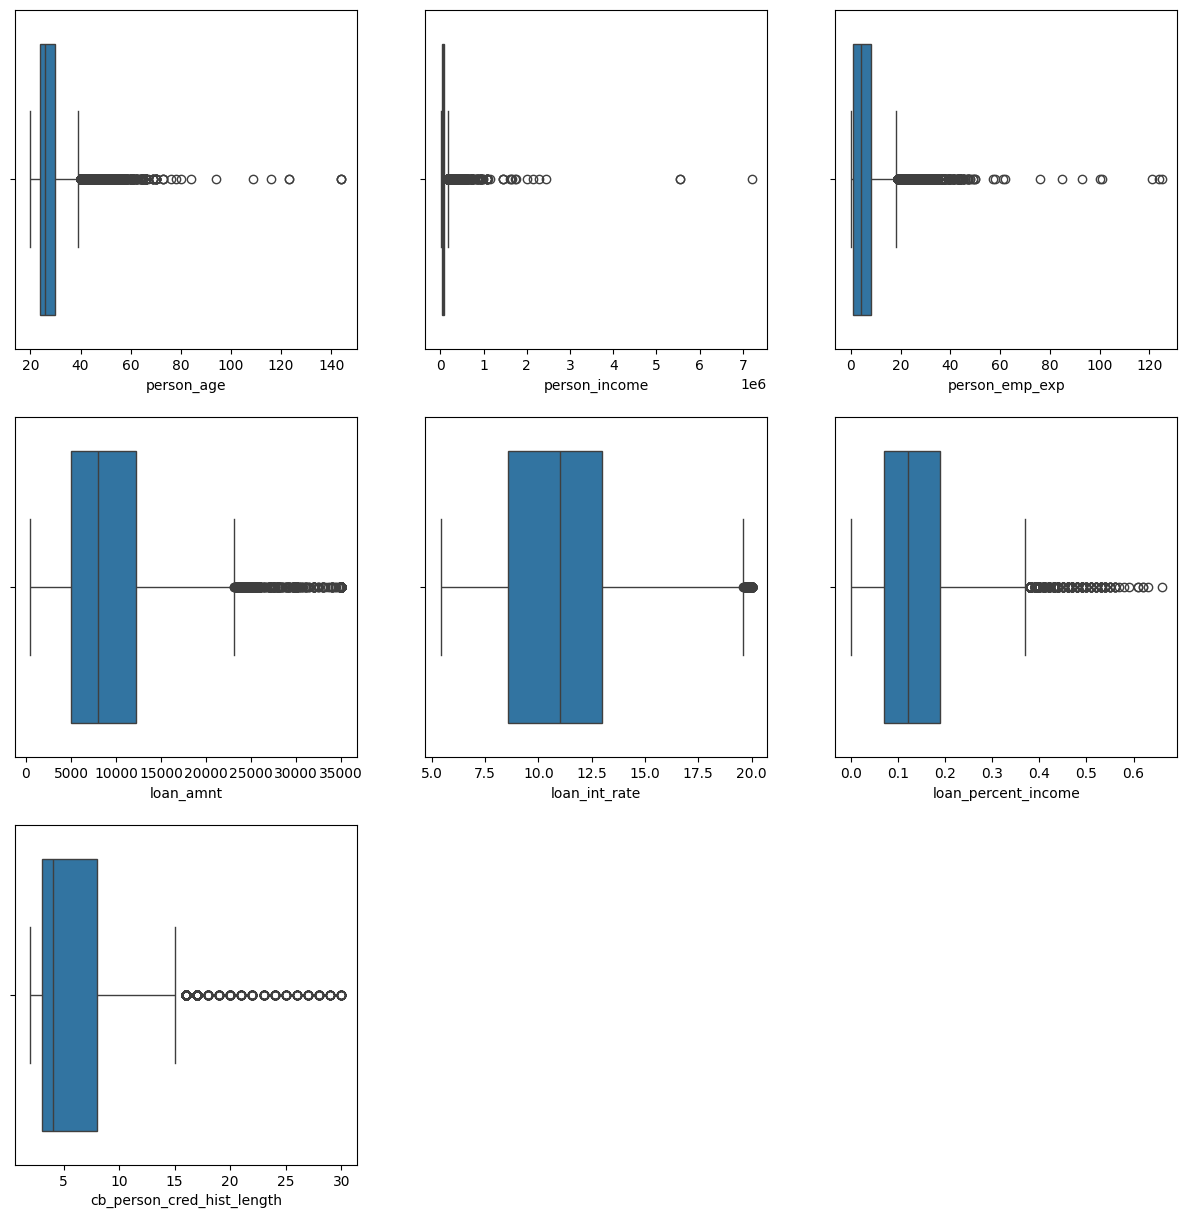

In [9]:
plt.figure(figsize=(15,15))
for i,col in zip(range(1,len(numerical)),df[numerical]) : 
    plt.subplot(3,3,i)
    sns.boxplot(data = df , x=df[col])
plt.show()

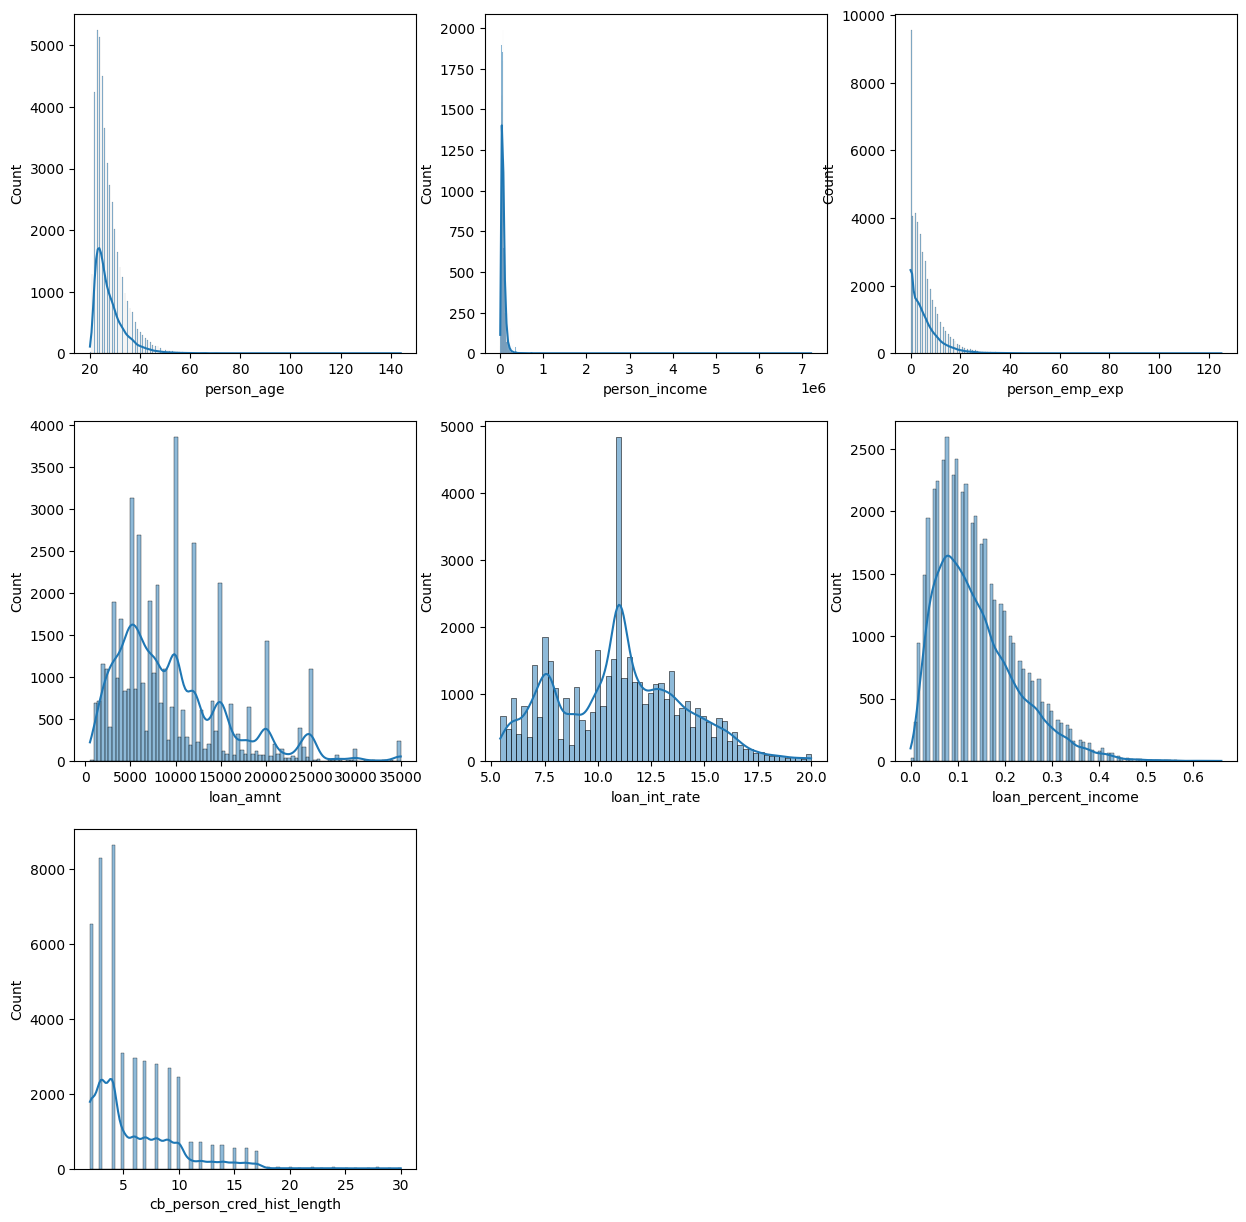

In [10]:
plt.figure(figsize=(15,15))
for i,col in zip(range(1,len(numerical)),df[numerical]) : 
    plt.subplot(3,3,i)
    sns.histplot(data = df , x=df[col] , kde=True)
plt.show()

In [11]:
def detect_outliers(df, numerical_cols, lower_factor=1.5, upper_factor=1.5):
    outlier_data = pd.DataFrame()
    all_outliers_idx = set()  # Track indices of outliers

    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - lower_factor * IQR
        upper_bound = Q3 + upper_factor * IQR

        if not df.empty:
            print(f"{col}: Min Value = {df[col].min()}, Max Value = {df[col].max()}")
            print(f"{col}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}\n")

        outliers = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
        all_outliers_idx.update(outliers.index)  # Store outlier indices
    
    # Separate outliers and cleaned data
    outlier_data = df.loc[list(all_outliers_idx)]
    df_cleaned = df.drop(index=all_outliers_idx)

    print("Outliers detected and stored in 'outlier_data'. Remaining data cleaned.")

    return df_cleaned, outlier_data

In [12]:
dfCleaned, outlierData = detect_outliers(df, numerical , 1.5 , 1.5)

person_age: Min Value = 20, Max Value = 144
person_age: Lower Bound = 15.0, Upper Bound = 39.0

person_income: Min Value = 8000.0, Max Value = 7200766.0
person_income: Lower Bound = -25673.875, Upper Bound = 168667.125

person_emp_exp: Min Value = 0, Max Value = 125
person_emp_exp: Lower Bound = -9.5, Upper Bound = 18.5

loan_amnt: Min Value = 500.0, Max Value = 35000.0
loan_amnt: Lower Bound = -5855.875, Upper Bound = 23093.125

loan_int_rate: Min Value = 5.42, Max Value = 20.0
loan_int_rate: Lower Bound = 1.9899999999999993, Upper Bound = 19.59

loan_percent_income: Min Value = 0.0, Max Value = 0.66
loan_percent_income: Lower Bound = -0.10999999999999999, Upper Bound = 0.37

cb_person_cred_hist_length: Min Value = 2.0, Max Value = 30.0
cb_person_cred_hist_length: Lower Bound = -4.5, Upper Bound = 15.5

credit_score: Min Value = 390, Max Value = 850
credit_score: Lower Bound = 497.5, Upper Bound = 773.5

Outliers detected and stored in 'outlier_data'. Remaining data cleaned.


In [13]:
print(f"Cleaned Shape: {dfCleaned.shape[0]}")
print(f"Outlier Shape: {outlierData.shape[0]}")
print(f"Sum of Cleaned & Outliers: {dfCleaned.shape[0] + outlierData.shape[0]}")

Cleaned Shape: 37549
Outlier Shape: 7451
Sum of Cleaned & Outliers: 45000


In [14]:
adjusted_data = outlierData[outlierData["person_age"] > 100].copy() 
adjusted_data["person_age"] = adjusted_data["person_age"].apply(lambda x: x % 100 if x > 120 else 0)

In [15]:
myFinalData = pd.concat([dfCleaned,adjusted_data[adjusted_data['person_age']>0 ]])
myFinalData

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
5,21,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
9,21,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1
11,21,female,Associate,13113.0,0,OWN,4500.0,HOMEIMPROVEMENT,8.63,0.34,2.0,651,No,1
19,24,female,Master,14283.0,1,MORTGAGE,1750.0,EDUCATION,10.99,0.12,2.0,679,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,44,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,44,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,23,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,23,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0


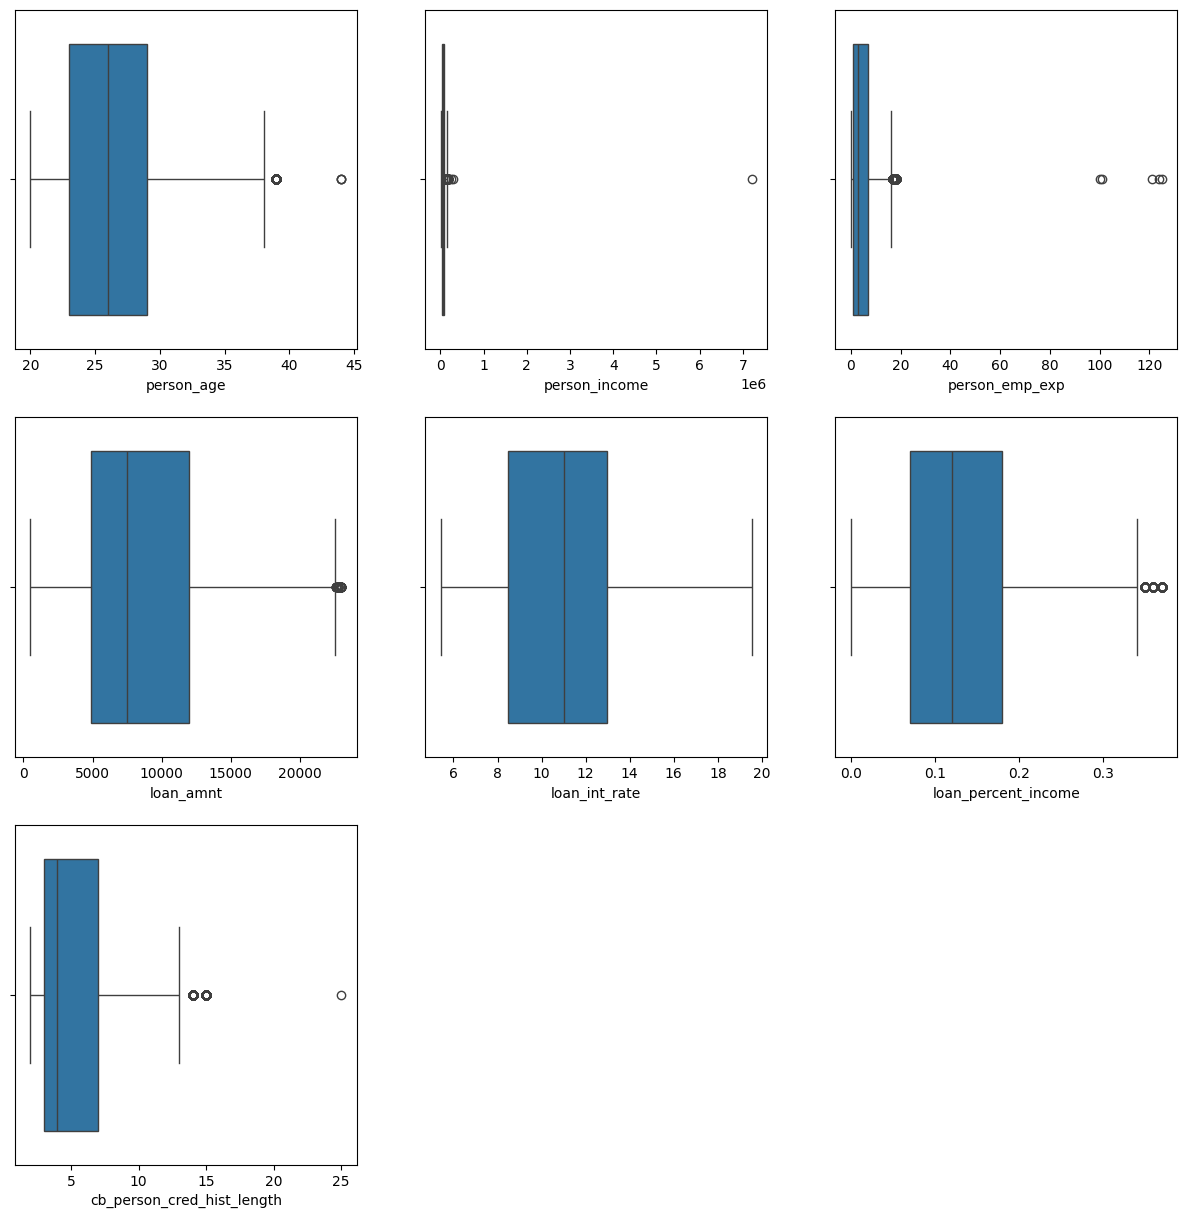

In [16]:
plt.figure(figsize=(15,15))
for i,col in zip(range(1,len(numerical)),myFinalData[numerical]) : 
    plt.subplot(3,3,i)
    sns.boxplot(data = myFinalData , x=myFinalData[col])
plt.show()

In [17]:
numerical.append('loan_status')
correlation = myFinalData[numerical].corr()

<Figure size 1000x1000 with 0 Axes>

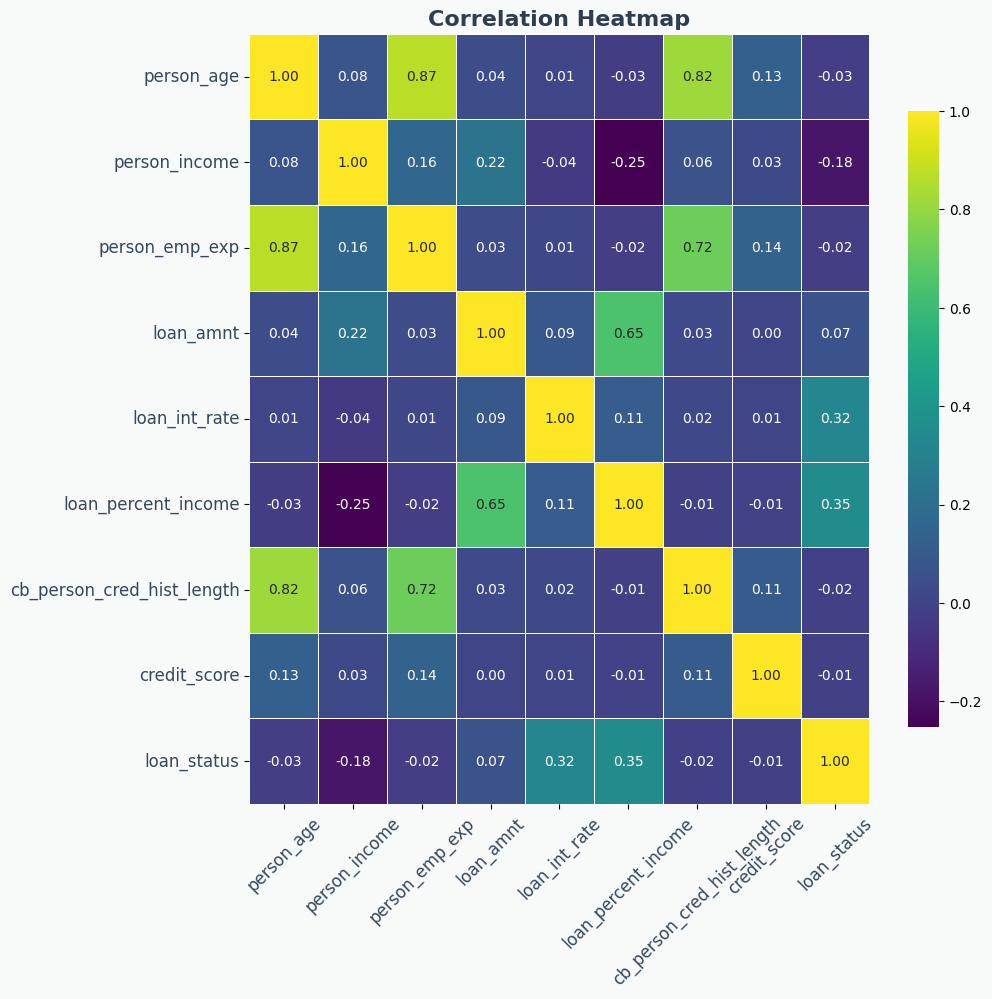

In [18]:
plt.figure(figsize=(10, 10), facecolor="#F8F9F9")  

custom_cmap = sns.color_palette("viridis", as_cmap=True) 

plt.figure(figsize=(10, 10), facecolor="#F8F9F9")  

ax = sns.heatmap(
    correlation, 
    annot=True, 
    cmap=custom_cmap,  
    linewidths=0.5, 
    linecolor="white", 
    fmt=".2f", 
    cbar_kws={"shrink": 0.8} 
)

ax.set_facecolor("#ECF0F1")  
plt.title("Correlation Heatmap", fontsize=16, fontweight="bold", color="#2C3E50")
plt.xticks(fontsize=12, color="#34495E", rotation=45)
plt.yticks(fontsize=12, color="#34495E")
plt.grid(False)

plt.show()

In [19]:
def plotNumeric (df , columnName ) : 
    plt.figure(figsize=(8, 6), facecolor="#F8F9F9") 

    ax = sns.histplot(
        df[columnName], 
        bins=30, 
        kde=True, 
        color="#004D40", 
        edgecolor="black"
    )

    ax.set_facecolor("#ECF0F1") 

    plt.title(f"Distribution of {columnName}", fontsize=14, fontweight="bold", color="#2C3E50") 
    plt.xlabel(columnName, fontsize=12, fontweight="bold", color="#34495E")
    plt.ylabel("Frequency", fontsize=12, fontweight="bold", color="#34495E")

    for line in ax.lines:  
        line.set_color("#FFC107") 
        line.set_linewidth(2)

    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.xticks(fontsize=10, color="#2C3E50")
    plt.yticks(fontsize=10, color="#2C3E50")

    plt.show()

In [20]:
def plotCategorical(df, columnName): 
    plt.figure(figsize=(8, 6), facecolor="#F8F9F9")  

    ax = sns.countplot(
        data=df, 
        x=df[columnName], 
        palette=["#004D40", "#FFC107"],  
        edgecolor="black"
    )

    ax.set_facecolor("#ECF0F1") 

    plt.title(f"Count of {columnName}", fontsize=14, fontweight="bold", color="#2C3E50") 
    plt.xlabel(columnName, fontsize=12, fontweight="bold", color="#34495E")
    plt.ylabel("Count", fontsize=12, fontweight="bold", color="#34495E")

    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.xticks(fontsize=10, color="#2C3E50", rotation=30) 
    plt.yticks(fontsize=10, color="#2C3E50")

    plt.show()

In [21]:
print("The Mean of the Age:", f"{myFinalData.person_age.mean():.2f}")

The Mean of the Age: 26.62


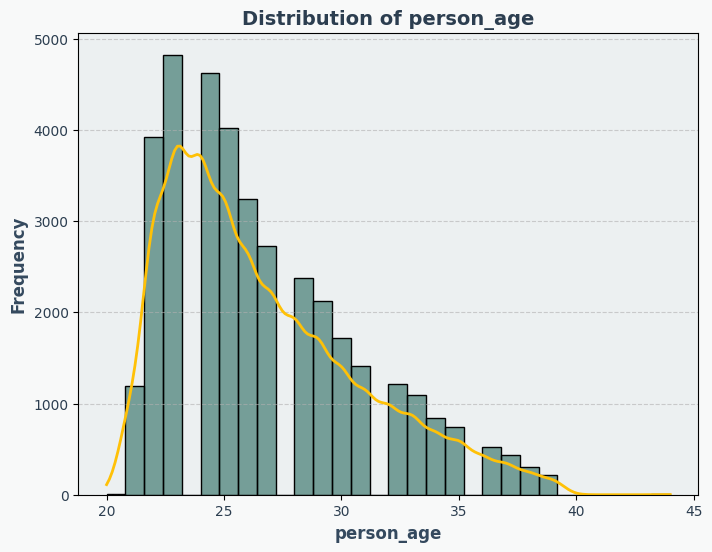

In [22]:
plotNumeric(myFinalData , 'person_age')

Column :  person_gender 



C:\Users\nabhp\AppData\Local\Temp\ipykernel_45944\4020661926.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


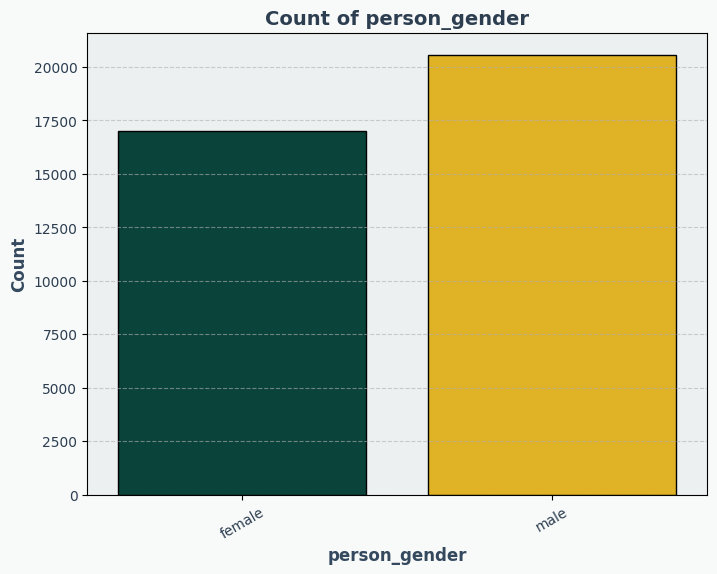

Column :  person_education 



C:\Users\nabhp\AppData\Local\Temp\ipykernel_45944\4020661926.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\nabhp\AppData\Local\Temp\ipykernel_45944\4020661926.py:4: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(


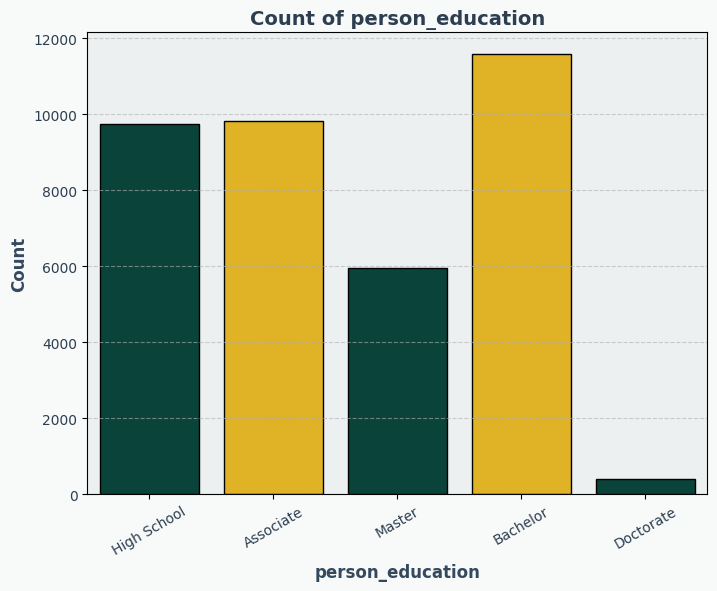

Column :  person_home_ownership 



C:\Users\nabhp\AppData\Local\Temp\ipykernel_45944\4020661926.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\nabhp\AppData\Local\Temp\ipykernel_45944\4020661926.py:4: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(


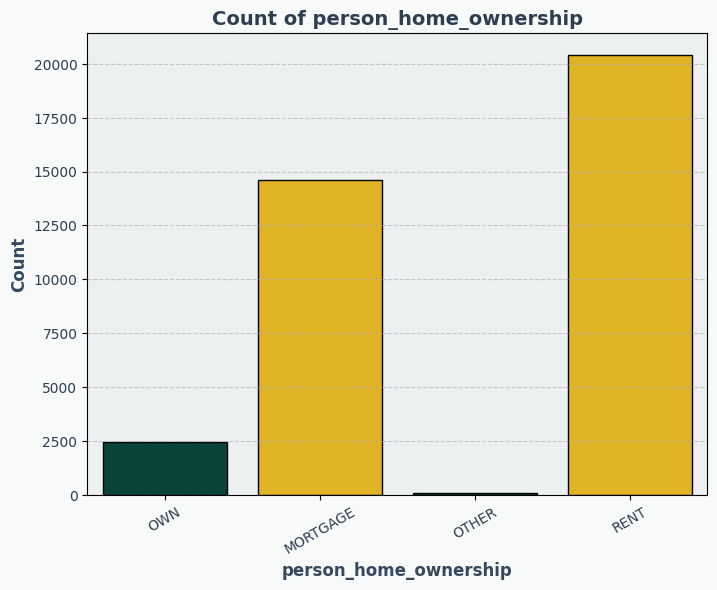

Column :  loan_intent 



C:\Users\nabhp\AppData\Local\Temp\ipykernel_45944\4020661926.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\nabhp\AppData\Local\Temp\ipykernel_45944\4020661926.py:4: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(


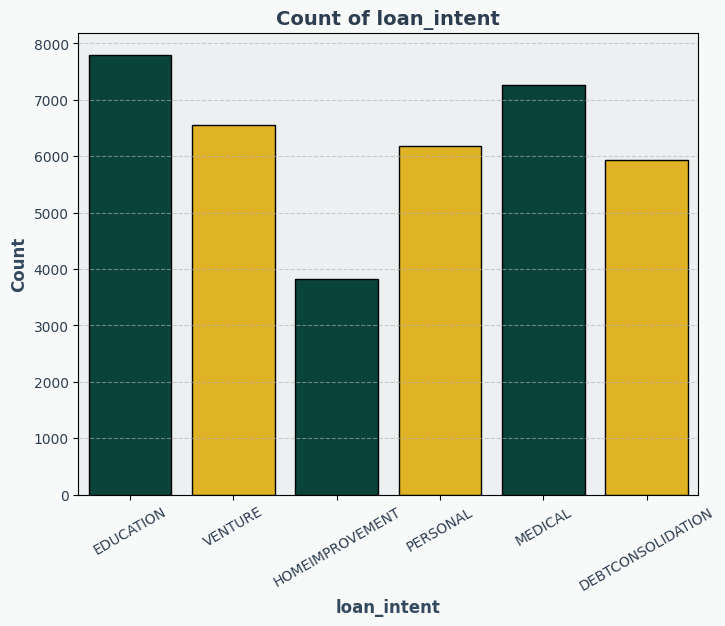

Column :  previous_loan_defaults_on_file 



C:\Users\nabhp\AppData\Local\Temp\ipykernel_45944\4020661926.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


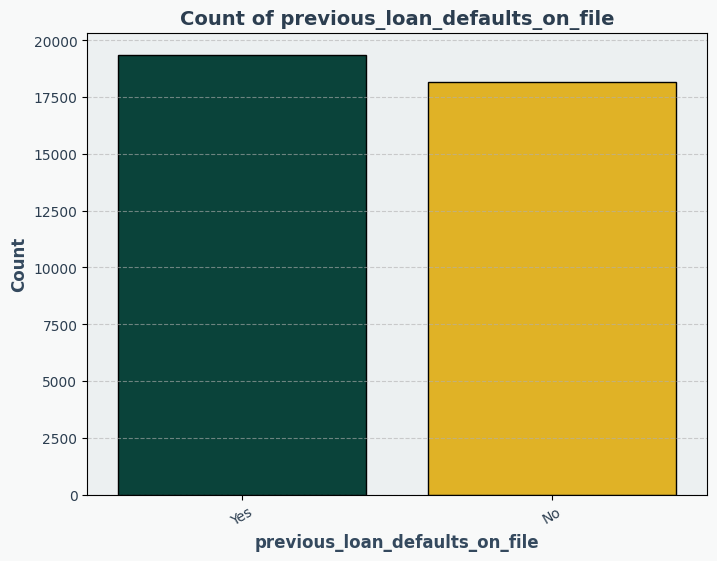

In [23]:
for col in myFinalData[categoriacl] : 
    print("Column : ",col , "\n")
    plotCategorical(myFinalData , col )

In [24]:
encode = LabelEncoder()

In [25]:
for col in categoriacl : 
    myFinalData[col] = encode.fit_transform(myFinalData[col])

In [26]:
X = myFinalData.drop(columns=['loan_status'] , axis=1)
Y = myFinalData['loan_status']

In [27]:
xtrain , xtest , ytrain , ytest = train_test_split(X,Y , test_size=0.2 , random_state=42)

In [28]:
scaler = StandardScaler()

In [29]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [30]:
xtrain = pd.DataFrame(xtrain , columns=myFinalData.columns[:13])
xtest = pd.DataFrame(xtest , columns=myFinalData.columns[:13])

In [31]:
ClassificationModels = {
    'Logisitic Regression' : LogisticRegression() ,
    'Random Forest' : RandomForestClassifier() , 
    'Descion Tree': DecisionTreeClassifier() , 
    'SVC' : SVC() , 
    'XGBoost' : XGBClassifier()
}

In [32]:
for name, model in ClassificationModels.items():
    model.fit(xtrain, ytrain)
    joblib.dump(model, f"Models/{name}.pkl")
    print(f"{name} model has been trained successfully!")

Logisitic Regression model has been trained successfully!
Random Forest model has been trained successfully!
Descion Tree model has been trained successfully!
SVC model has been trained successfully!
XGBoost model has been trained successfully!


In [33]:
for name, model in ClassificationModels.items():
    modelPredictionForTrain = model.predict(xtrain)
    modelPredictionForTest = model.predict(xtest)
    print(name , " train Score by score Func = " , model.score(xtrain,ytrain))
    print(name , " test Score by score Func = " , model.score(xtest,ytest))
    print(name , " train Score by acc score Func = " , accuracy_score(ytrain,modelPredictionForTrain))
    print(name , " test Score by acc score Func = " , accuracy_score(ytest,modelPredictionForTest))
    print("Model Classification Report\n")
    print(classification_report(ytest,modelPredictionForTest))
    print("--------------------------------------------------------")

Logisitic Regression  train Score by score Func =  0.8895915853942682
Logisitic Regression  test Score by score Func =  0.8908267873785115
Logisitic Regression  train Score by acc score Func =  0.8895915853942682
Logisitic Regression  test Score by acc score Func =  0.8908267873785115
Model Classification Report

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5890
           1       0.75      0.74      0.74      1621

    accuracy                           0.89      7511
   macro avg       0.84      0.83      0.84      7511
weighted avg       0.89      0.89      0.89      7511

--------------------------------------------------------
Random Forest  train Score by score Func =  1.0
Random Forest  test Score by score Func =  0.9222473705232326
Random Forest  train Score by acc score Func =  1.0
Random Forest  test Score by acc score Func =  0.9222473705232326
Model Classification Report

              precision    recall  f1-score 

In [38]:
lr = joblib.load("Models/Logisitic Regression.pkl")
rf = joblib.load("Models/Random Forest.pkl")
svc = joblib.load("Models/SVC.pkl")
xgb = joblib.load("Models/XGBoost.pkl")

lr_prediction = lr.predict(xtest)
rf_prediction = rf.predict(xtest)
svc_prediction = svc.predict(xtest)
xgb_prediction = xgb.predict(xtest)

ensemble_prediction = np.array([])
for i in range(len(xtest)):
    if sum([lr_prediction[i], rf_prediction[i], svc_prediction[i], xgb_prediction[i]]) >= 3:
        ensemble_prediction = np.append(ensemble_prediction, 1)
    else:
        ensemble_prediction = np.append(ensemble_prediction, 0)

print("Ensemble Model Accuracy Score: ", accuracy_score(ytest, ensemble_prediction))
print("Ensemble Model Classification Report\n")
print(classification_report(ytest, ensemble_prediction))

Ensemble Model Accuracy Score:  0.9201171614964718
Ensemble Model Classification Report

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5890
           1       0.88      0.73      0.80      1621

    accuracy                           0.92      7511
   macro avg       0.91      0.85      0.87      7511
weighted avg       0.92      0.92      0.92      7511

